Basic Version

In [112]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Cleaning Dataset

Percentage of Undernourishment Prevalence (3-Year Average)

In [113]:
# Read the Percentage of Undernourishment Prevalence CSV file online
df_pup_url = "https://raw.githubusercontent.com/verneylmavt/2D_Project_Term-3/main/2D_Data-Set_All-Country_Percentage%20of%20Undernourishment.csv"
df_pup = pd.read_csv(df_pup_url, encoding='latin-1')
df_pup = df_pup.set_index("Area")
display(df_pup)

,ï»¿Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
Area,,,,,,,,,,,,,,
Afghanistan,FS,Suite of Food Security Indicators,4,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20002002,2000-2002,%,47.8,E,Estimated value,NaN
Afghanistan,FS,Suite of Food Security Indicators,4,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20012003,2001-2003,%,45.6,E,Estimated value,NaN
Afghanistan,FS,Suite of Food Security Indicators,4,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20022004,2002-2004,%,40.6,E,Estimated value,NaN
Afghanistan,FS,Suite of Food Security Indicators,4,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20032005,2003-2005,%,38,E,Estimated value,NaN
Afghanistan,FS,Suite of Food Security Indicators,4,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20042006,2004-2006,%,36.1,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,FS,Suite of Food Security Indicators,716,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20152017,2015-2017,%,NaN,O,Missing value,NaN
Zimbabwe,FS,Suite of Food Security Indicators,716,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20162018,2016-2018,%,NaN,O,Missing value,NaN
Zimbabwe,FS,Suite of Food Security Indicators,716,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20172019,2017-2019,%,NaN,O,Missing value,NaN


In [114]:
df_pup_cambodia_myanmar = (df_pup.loc[["Cambodia", "Myanmar"], :]).copy()
cambodia_pup = (df_pup_cambodia_myanmar.loc["Cambodia", "Value"]).tolist()
myanmar_pup = (df_pup_cambodia_myanmar.loc["Myanmar", "Value"]).tolist()

GDP per Capita (USD)

In [115]:
# Read the GDP CSV file online
df_gdp_url = "https://raw.githubusercontent.com/verneylmavt/2D_Project_Term-3/main/2D_Data-Set_All-Country_GDP.csv"
df_gdp = pd.read_csv(df_gdp_url)
df_gdp = df_gdp.set_index("Country Name")
display(df_gdp)

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25496.843940,26442.426800,26895.057170,28399.050130,28453.715560,29348.418970,30253.714230,31135.884360,23384.298790,NaN
Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.726326,162.555968,172.271022,199.784916,180.228774,199.517227,211.054388,...,1777.303950,1748.905594,1736.242220,1556.316469,1446.533624,1629.404273,1541.031661,1511.309259,1360.878645,1557.722682
Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,...,638.845852,624.315454,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.930722,113.080062,118.829461,123.441090,131.852423,138.524029,144.323882,...,1965.115750,2157.494584,2212.914095,1894.322115,1673.843681,1613.490478,1704.135698,1777.852822,1709.764129,1774.921218
Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4978.434435,5127.717243,5094.112329,3127.890598,1728.023754,2313.220584,2524.942483,2177.799015,1631.431691,2137.909393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,4986.582469
"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1446.536472,1607.152173,1674.002572,1601.807163,1152.738019,964.340344,758.145949,750.554583,631.681490,690.759273
South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,511.618737,526.461750,546.261935,589.160460,632.716104,674.186433,714.562010,...,8222.197279,7467.079185,6988.808739,6259.839681,5756.965741,6690.939847,7005.095413,6624.761865,5655.867654,6994.211654


In [116]:
df_gdp_cambodia_myanmar = (df_gdp.loc[["Cambodia", "Myanmar"], "2001":"2020"]).copy()
cambodia_gdp = (df_gdp_cambodia_myanmar.loc["Cambodia", "2001":"2020"]).tolist()
myanmar_gdp = (df_gdp_cambodia_myanmar.loc["Myanmar", "2001":"2020"]).tolist()

Annual Inflation Rate (%)

In [117]:
# Read the Inflation Rate CSV file online
df_inflation_rate_url = "https://raw.githubusercontent.com/verneylmavt/2D_Project_Term-3/main/2D_Data-Set_All-Country_Inflation-Rate.csv"
df_inflation_rate = pd.read_csv(df_inflation_rate_url)
df_inflation_rate = df_inflation_rate.set_index("Country Name")
display(df_inflation_rate)

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978
Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN
Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603
Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.476738,1.767324,0.428958,-0.536929,0.273169,1.488234,1.053798,2.675992,0.198228,3.353691
"Yemen, Rep.",YEM,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.885387,10.968442,8.104726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Africa,ZAF,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.288859,2.102374,1.246285,1.33797,2.534972841,4.069029,3.489234,...,5.724658,5.784469,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672


In [118]:
df_inflation_rate_cambodia_myanmar = (df_inflation_rate.loc[["Cambodia", "Myanmar"], "2001":"2020"]).copy()
cambodia_inflation_rate = (df_inflation_rate_cambodia_myanmar.loc["Cambodia", "2001":"2020"]).tolist()
myanmar_inflation_rate = (df_inflation_rate_cambodia_myanmar.loc["Myanmar", "2001":"2020"]).tolist()

Gross per capita Production Index Number (2014-2016 = 100)

In [119]:
# Read the Production Index Number CSV file online
df_pin1416_url = "https://raw.githubusercontent.com/verneylmavt/2D_Project_Term-3/main/2D_Data-Set_All-Country_Gross-per-capita-Production-Index-Number-(2014-2016%20%3D%20100)_AVERAGE.csv"
df_pin1416 = pd.read_csv(df_pin1416_url, encoding='latin-1')
df_pin1416 = df_pin1416.set_index("Area")
display(df_pin1416)

,ï»¿Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
Area,,,,,,,,,,,,,
Afghanistan,QI,Production Indices,4,434,Gross per capita Production Index Number (2014...,F2051,Agriculture,1961,1961,index,161.93,E,Estimated value
Afghanistan,QI,Production Indices,4,434,Gross per capita Production Index Number (2014...,F2051,Agriculture,1962,1962,index,161.58,E,Estimated value
Afghanistan,QI,Production Indices,4,434,Gross per capita Production Index Number (2014...,F2051,Agriculture,1963,1963,index,159.56,E,Estimated value
Afghanistan,QI,Production Indices,4,434,Gross per capita Production Index Number (2014...,F2051,Agriculture,1964,1964,index,166.81,E,Estimated value
Afghanistan,QI,Production Indices,4,434,Gross per capita Production Index Number (2014...,F2051,Agriculture,1965,1965,index,170.37,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,QI,Production Indices,716,434,Gross per capita Production Index Number (2014...,F2051,Agriculture,2016,2016,index,95.59,E,Estimated value
Zimbabwe,QI,Production Indices,716,434,Gross per capita Production Index Number (2014...,F2051,Agriculture,2017,2017,index,100.70,E,Estimated value
Zimbabwe,QI,Production Indices,716,434,Gross per capita Production Index Number (2014...,F2051,Agriculture,2018,2018,index,115.99,E,Estimated value


In [120]:
df_pin1416_cambodia_myanmar = (df_pin1416.loc[["Cambodia", "Myanmar"], :]).copy()
df_pin1416_cambodia_myanmar["Year Code"] = df_pin1416_cambodia_myanmar["Year Code"].astype('int')
df_pin1416_cambodia_myanmar = df_pin1416_cambodia_myanmar.loc[
    (df_pin1416_cambodia_myanmar["Year Code"] >= 2001) & (df_pin1416_cambodia_myanmar["Year Code"] <= 2020), :]

cambodia_pin1416 = (df_pin1416_cambodia_myanmar.loc["Cambodia", "Value"]).tolist()
myanmar_pin1416 = (df_pin1416_cambodia_myanmar.loc["Myanmar", "Value"]).tolist()

Combining Dataset

In [121]:
df = pd.DataFrame()
df["Country"] = pd.concat([pd.DataFrame(np.full((20,), "Cambodia")), pd.DataFrame(np.full((20,), "Myanmar"))], ignore_index=True)
df["Year"] = df_pin1416_cambodia_myanmar.loc[:, "Year Code"].tolist()
df["Percentage of Undernourishment Prevalence (3-Year Average)"] = cambodia_pup + myanmar_pup
df["Binary Categorical"] = pd.concat([pd.DataFrame(np.full((20,), 0)), pd.DataFrame(np.full((20,), 1))], ignore_index=True)
df["GDP per Capita (USD)"] = cambodia_gdp + myanmar_gdp
df["Annual Inflation Rate (%)"] = cambodia_inflation_rate + myanmar_inflation_rate
df["Gross per capita Production Index Number (2014-2016 = 100)"] = cambodia_pin1416 + myanmar_pin1416

In [122]:
# 7 Columns, 4 Features & 1 Tragets with 2 additional columns as a Description
# 40 Rows, 2001-2020 Cambodia & 2001-2020 Myanmar
display(df)
print(df.shape)

,Country,Year,Percentage of Undernourishment Prevalence (3-Year Average),Binary Categorical,GDP per Capita (USD),Annual Inflation Rate (%),Gross per capita Production Index Number (2014-2016 = 100)
0,Cambodia,2001,23.6,0,321.150224,-0.600648,52.79
1,Cambodia,2002,21.2,0,338.987477,0.211467,49.46
2,Cambodia,2003,19.4,0,362.335482,0.941746,57.65
3,Cambodia,2004,18.5,0,408.513639,4.319337,53.83
4,Cambodia,2005,17,0,474.111192,6.615259,68.71
5,Cambodia,2006,15.6,0,539.750329,5.810686,73.50
6,Cambodia,2007,14.8,0,631.525258,8.708828,75.90
7,Cambodia,2008,14.5,0,745.609127,24.096852,81.68
8,Cambodia,2009,13,0,738.054731,-1.241718,84.33
9,Cambodia,2010,11.2,0,785.502667,3.996395,89.31


(40, 7)


In [123]:
try:
    df["Percentage of Undernourishment Prevalence (3-Year Average)"] = pd.to_numeric((df["Percentage of Undernourishment Prevalence (3-Year Average)"].copy()).str.replace('<', ''), 'ignore')
except:
    pass

In [167]:
df = df.astype({'Percentage of Undernourishment Prevalence (3-Year Average)':'float','GDP per Capita (USD)':'float',
                'Annual Inflation Rate (%)': 'float','Gross per capita Production Index Number (2014-2016 = 100)': 'float'
                })

In [125]:
# List of all columns
print(list(df.columns))

['Country', 'Year', 'Percentage of Undernourishment Prevalence (3-Year Average)', 'Binary Categorical', 'GDP per Capita (USD)', 'Annual Inflation Rate (%)', 'Gross per capita Production Index Number (2014-2016 = 100)']


In [126]:
# Preparation Functions
def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:, feature_names]
    df_target = df.loc[:, target_names]
    return pd.DataFrame(df_feature), pd.DataFrame(df_target)


def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    df_feature_rows, df_feature_columns = df_feature.shape
    array_all = list(range(0, df_feature_rows))
    
    np.random.seed(random_state)
    array_test = list(np.random.choice(array_all, int((df_feature_rows)*test_size), replace=False))
    array_train = [i for i in array_all if i not in array_test]
    
    df_feature_test = df_feature.iloc[array_test, :]
    df_feature_train = df_feature.iloc[array_train, :]
    df_target_test = df_target.iloc[array_test, :]
    df_target_train = df_target.iloc[array_train, :]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test


def normalize_z(dfin):
    mean = dfin.mean(axis=0)
    sd = dfin.std(axis=0)
    dfout = ((dfin.copy())-mean)/sd
    return dfout


def prepare_feature(df_feature):
    matrix_feature = (df_feature.copy()).to_numpy()
    matrix_one = np.ones([len(df_feature), 1])
    matrix_feature = np.concatenate((matrix_one, matrix_feature), axis=1)
    return matrix_feature


def prepare_target(df_target):
    matrix_target = (df_target.copy()).to_numpy()
    return matrix_target

In [127]:
# Calculation Functions
def calc_linear(X, beta):
    beta_new_rows = int((X.size)/(len(X)))
    beta_new_columns = int((beta.size)/(beta_new_rows))
    beta = beta.reshape(beta_new_rows, beta_new_columns)
    return np.matmul(X, beta)


def compute_cost(X, y, beta):
    yhat = calc_linear(X, beta)
    yhat_y = yhat - y
    J = (np.matmul((yhat_y).T, yhat_y))/(2*len(X))
    return J


def gradient_descent(X, y, beta, alpha, num_iters):
    J_storage = np.array([])
    for i in range(num_iters):
        cost_value = calc_linear(X.T, ((calc_linear(X,beta))-y))/len(X)
        beta = beta - alpha*cost_value
        J_storage = np.append(J_storage, cost_value)
    return beta, J_storage


def predict(df_feature, beta):
    df_feature_z = normalize_z(df_feature.copy())
    X = prepare_feature(df_feature_z)
    yhat = calc_linear(X, beta)
    return yhat


def linear_regression(X, y, alpha, iterations):
    beta = np.zeros(((X.shape[1]), 1))
    beta, J_storage = gradient_descent(X, y, beta, alpha, iterations)
    yhat = predict(X, beta)
    return beta, J_storage, yhat

In [128]:
# Metrics Functions
def r2_score(y, ypred):
    y_mean = np.mean(y)
    ss_tot = np.sum(np.power((y-y_mean), 2))
    ss_res = np.sum(np.power(np.subtract(y, ypred), 2))
    return 1 - ((ss_res)/ss_tot)


def mean_squared_error(y, ypred):
    ss_res = np.sum(np.power(np.subtract(y, ypred), 2))
    mse = (ss_res)/(len(y))
    return mse


def adjusted_r2_score(y, ypred, p):
    r2 = r2_score(y,ypred)
    n = y.shape[0]
    return 1 - (((1-r2)*(n-1))/(n-p-1))


def std_dev_score(y, ypred):
    n = y.shape[0]
    return (np.sum(np.subtract(y, ypred))/(n-1))**(0.5)


def std_error_reg_score(y, ypred, p):
    adjusted_r2 = adjusted_r2_score(y, ypred, p)
    std_dev = std_dev_score(y, ypred)
    return ((1-adjusted_r2)**(0.5))*std_dev

In [129]:
# CATEGORY:
#'Country' 
#'Year'

# TARGET: 
#'Percentage of Undernourishment Prevalence (3-Year Average)'

# FEATURES: 
#'Binary Categorical'
# 'GDP per Capita (USD)'
# 'Annual Inflation Rate (%)' 
# 'Gross per capita Production Index Number (2014-2016 = 100)'

Preparing Dataset

In [166]:
# Extract the features and the target
features = ['Binary Categorical', 'GDP per Capita (USD)', 'Annual Inflation Rate (%)', 'Gross per capita Production Index Number (2014-2016 = 100)']
targets = ['Percentage of Undernourishment Prevalence (3-Year Average)']
df_features, df_target = get_features_targets(df, features, targets) #DataFrame

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3) #DataFrame

# Normalize the features train using z normalization
df_features_train_z = normalize_z(df_features_train) #DataFrame
df_features_train_z["Binary Categorical"] = (df_features_train.loc[:, "Binary Categorical"]).copy()

# Prepare the features train and target train to a NumPy
X = prepare_feature(df_features_train_z) #NumPy 5D
target = prepare_target(df_target_train) #NumPy 1D

In [131]:
# Display the Descriptive Statistics
display(df_features.describe())
display(df_target.describe())

,Binary Categorical,GDP per Capita (USD),Annual Inflation Rate (%),Gross per capita Production Index Number (2014-2016 = 100)
count,40.00000,40.000000,40.000000,40.000000
mean,0.50000,825.396363,9.076909,87.907750
std,0.50637,454.494599,11.928724,17.631598
min,0.00000,128.099702,-1.241718,49.460000
25%,0.00000,396.969100,2.928896,75.300000
50%,0.50000,833.889141,4.987380,98.010000
75%,1.00000,1175.309923,8.737888,100.865000
max,1.00000,1643.121389,57.074511,106.810000


,Percentage of Undernourishment Prevalence (3-Year Average)
count,40.000000
mean,13.590000
std,9.418607
min,2.500000
25%,6.525000
50%,9.950000
75%,18.725000
max,37.600000


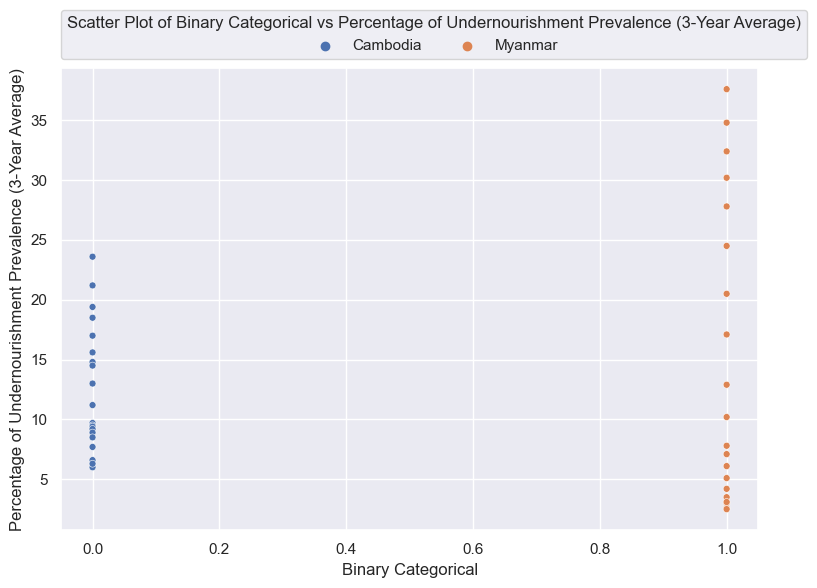

In [132]:
# Scatter Plot of Binary Categorical vs Percentage of Undernourishment Prevalence (3-Year Average)
# ALL DATA SET 
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Binary Categorical", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df, 
                hue="Country", s=25)
myplot.legend(title = "Scatter Plot of " + "Binary Categorical" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

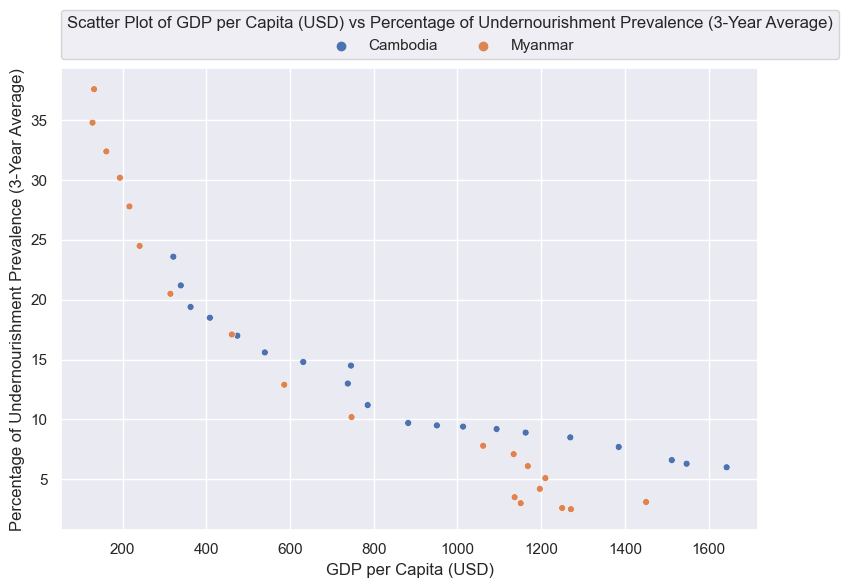

In [133]:
# Scatter Plot of GDP per Capita (USD) vs Percentage of Undernourishment Prevalence (3-Year Average)
# ALL DATA SET 
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "GDP per Capita (USD)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df, 
                hue="Country", s=25)
myplot.legend(title = "Scatter Plot of " + "GDP per Capita (USD)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

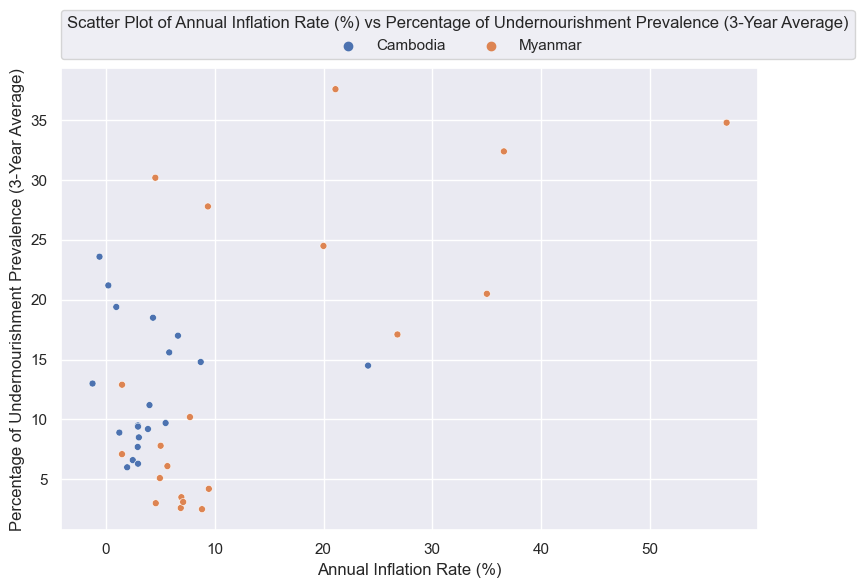

In [134]:
# Annual Inflation Rate (%) vs Percentage of Undernourishment Prevalence (3-Year Average)
# ALL DATA SET 
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Annual Inflation Rate (%)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df, 
                hue="Country", s=25)
myplot.legend(title = "Scatter Plot of " + "Annual Inflation Rate (%)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

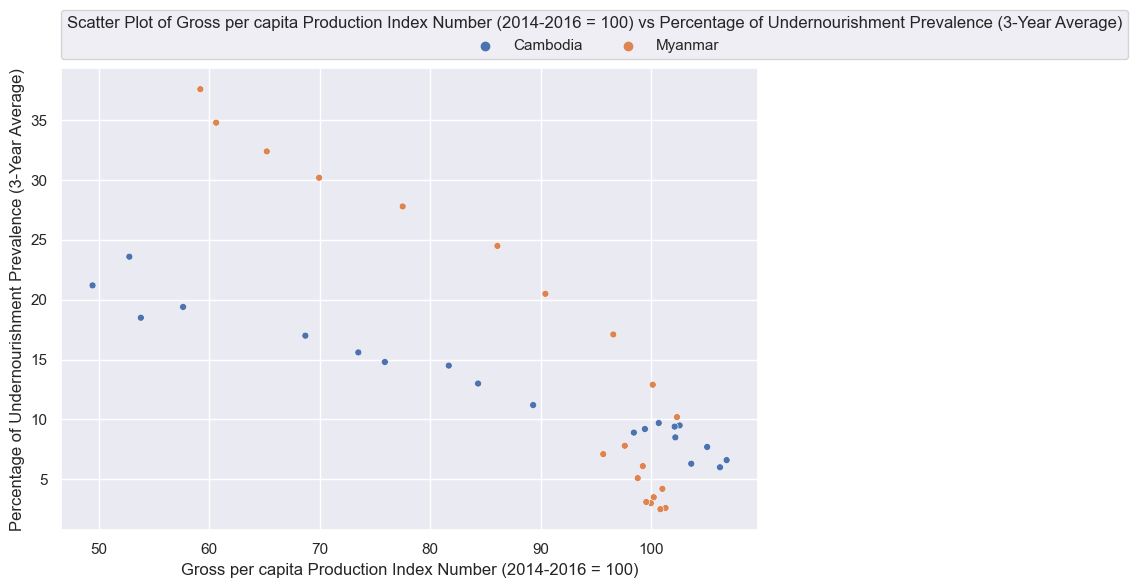

In [135]:
# Gross per capita Production Index Number (2014-2016 = 100) vs Percentage of Undernourishment Prevalence (3-Year Average)
# ALL DATA SET 
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Gross per capita Production Index Number (2014-2016 = 100)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df, 
                hue="Country", s=25)
myplot.legend(title = "Scatter Plot of " + "Gross per capita Production Index Number (2014-2016 = 100)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

Calculating Dataset

$J\left(\hat{\beta}_0, \hat{\beta}_1\right)=\frac{1}{2 m} \sum_{i=1}^m\left(\hat{y}\left(x^i\right)-y^i\right) \times\left(\hat{y}\left(x^i\right)-y^i\right)$

In [136]:
# Multiple Variables Cost Function
# Set the value of Beta (same size as features added by column vector of 1)
beta_multiple = np.zeros(((X.shape[1]), 1)) #NumPy 1D
J = compute_cost(X, target, beta_multiple)
print(J)

[[113.70642857]]


$\hat{\beta}_0=\hat{\beta}_0-\alpha \frac{1}{m} \Sigma_{i=1}^m\left(\hat{y}\left(x^i\right)-y^i\right) x_0^i$
<br>

$\hat{\beta}_1=\hat{\beta}_1-\alpha \frac{1}{m} \Sigma_{i=1}^m\left(\hat{y}\left(x^i\right)-y^i\right) x_1^i$
<br>

$\hat{\beta}_2=\hat{\beta}_2-\alpha \frac{1}{m} \sum_{i=1}^m\left(\hat{y}\left(x^i\right)-y^i\right) x_2^i$
<br>

$\cdots$
<br>

$\hat{\beta}_n=\hat{\beta}_n-\alpha \frac{1}{m} \sum_{i=1}^m\left(\hat{y}\left(x^i\right)-y^i\right) x_n^i$
<br>

In [137]:
# Beta After Iterations and J After Iterations
# Set the value of Iterations, Alpha
alpha = 0.01
iterations = 1500

# Call the gradient_descent function
beta_multiple, J_storage_multiple = gradient_descent(X, target, beta_multiple, alpha, iterations)
print(beta_multiple)

$\mathbf{X}=\left[\begin{array}{cccc}1 & x_1^1 & \ldots & x_n^1 \\ 1 & x_1^2 & \ldots & x_n^2 \\ \ldots & \ldots & \ldots & \ldots \\ 1 & x_1^m & \ldots & x_n^m\end{array}\right] \in \mathbb{R}^{m \times(n+1)}$

$\hat{\mathbf{b}}=\left[\begin{array}{c}\hat{\beta}_0 \\ \hat{\beta}_1 \\ \cdots \\ \hat{\beta}_n\end{array}\right] \in \mathbb{R}^{n+1}$

$\hat{\mathbf{y}}=\mathbf{X} \times \hat{\mathbf{b}}$

In [139]:
# Predicted Value
# Call the predict() method to get the predicted value of Feature Test
pred = predict(df_features_test, beta_multiple) #NumPy 1D

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


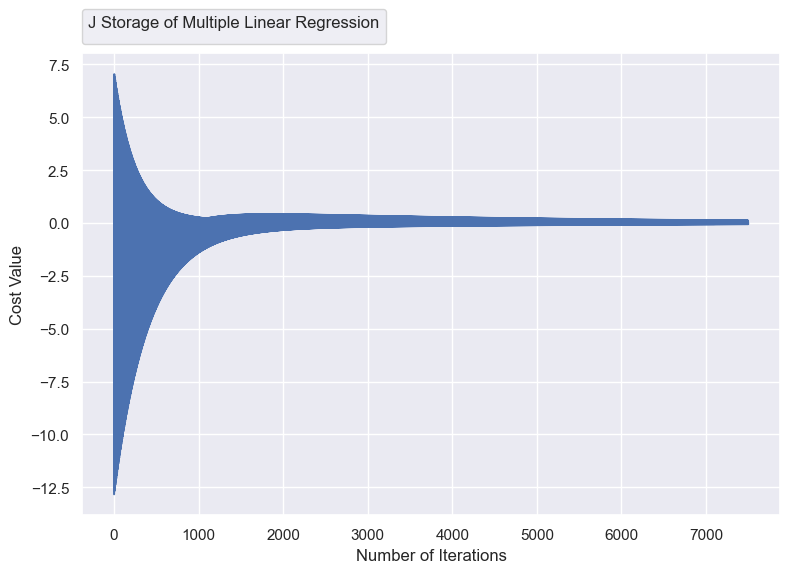

In [140]:
# Plot the graph of Cost Value in each iteration
sns.set()
myplot = sns.lineplot(x=(np.linspace(start=0, stop=len(J_storage_multiple), num=len(J_storage_multiple), endpoint=False)), y=J_storage_multiple)
myplot.set_xlabel('Number of Iterations')
myplot.set_ylabel('Cost Value')
myplot.legend(title = "J Storage of Multiple Linear Regression", 
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

In [142]:
# Index used in test dataset after splitting data
df_plot_index = list(df_features_test.index)

# Comparing Real Value of Test Dataset vs Predicted Value of Test Dataset
df_compare_target_predict = df.loc[df_plot_index, ["Country", "Year", "Percentage of Undernourishment Prevalence (3-Year Average)"]]
df_compare_target_predict["Predicted Percentage of Undernourishment Prevalence (3-Year Average)"] = pred.copy()
df_compare_target_predict = df_compare_target_predict.sort_index(ascending=True)
display(df_compare_target_predict)
df_compare_target_predict = df_compare_target_predict.reset_index(drop=True)
df_compare_target_predict["Features"] = (np.linspace(1, len(df_compare_target_predict), num=len(df_compare_target_predict))).astype(int)

max_val_target_predict = df_compare_target_predict.loc[:, ["Percentage of Undernourishment Prevalence (3-Year Average)", "Predicted Percentage of Undernourishment Prevalence (3-Year Average)"]].max(axis=0)
max_val_target_predict = max(max_val_target_predict.tolist())

,Country,Year,Percentage of Undernourishment Prevalence (3-Year Average),Predicted Percentage of Undernourishment Prevalence (3-Year Average)
0,Cambodia,2001,23.6,19.690680
6,Cambodia,2007,14.8,14.850472
7,Cambodia,2008,14.5,14.365767
19,Cambodia,2020,6.3,2.492395
20,Myanmar,2001,37.6,22.501206
21,Myanmar,2002,34.8,25.324223
25,Myanmar,2006,24.5,18.287035
28,Myanmar,2009,12.9,11.869561
33,Myanmar,2014,5.1,6.386473
34,Myanmar,2015,4.2,6.626395


Text(9.150002859375894, 35.471698113207545, 'Blue: Real Value')

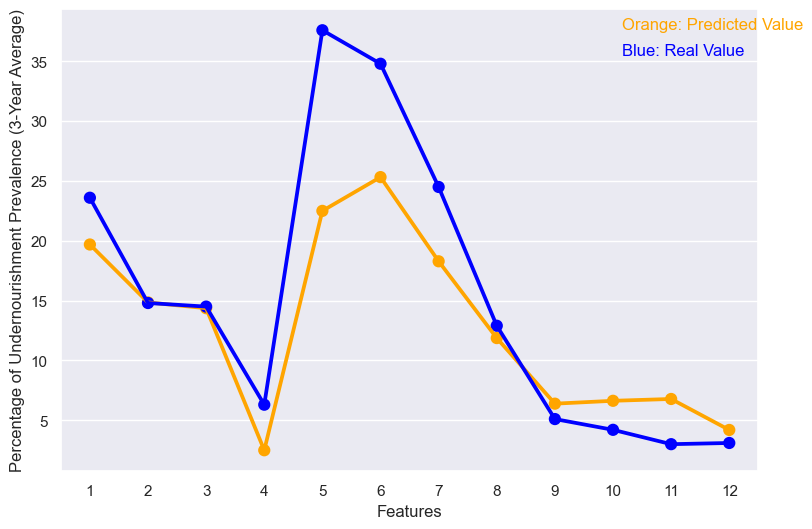

In [143]:
sns.set(rc={'figure.figsize':(9,6)})
sns.pointplot(data=df_compare_target_predict,
            x="Features", y="Predicted Percentage of Undernourishment Prevalence (3-Year Average)", 
            color="orange", label="Real Value")
#plt.annotate("Real Value", (9.4, 8))
sns.pointplot(data=df_compare_target_predict, 
            x="Features", y="Percentage of Undernourishment Prevalence (3-Year Average)", 
            color="blue")
plt.annotate("Orange: Predicted Value", 
            xy=(len(df_compare_target_predict)/1.311475, 1.0027*max_val_target_predict),
            color="orange")
plt.annotate("Blue: Real Value", 
            xy=(len(df_compare_target_predict)/1.311475, max_val_target_predict/1.06),
            color="blue")

Visualizing Dataset in Scatterplot with Seaborn

In [144]:
# Make a new DataFrame for easier visualization

# 1st DataFrame for Real Value
df_plot_1 = df.loc[df_plot_index, :]
real_value_target = df_plot_1.pop("Percentage of Undernourishment Prevalence (3-Year Average)")
df_plot_1["Percentage of Undernourishment Prevalence (3-Year Average)"] = real_value_target
df_plot_1["Value Type"] = ""
df_plot_1.loc[:, "Value Type"] = "Real Value"

# 2nd DataFrame for Predicted Value
df_plot_2 = df.loc[df_plot_index, :]
df_plot_2.pop("Percentage of Undernourishment Prevalence (3-Year Average)")
predicted_value_target = pred
df_plot_2["Percentage of Undernourishment Prevalence (3-Year Average)"] = predicted_value_target
df_plot_2["Value Type"] = ""
df_plot_2.loc[:, "Value Type"] = "Predicted Value"

# Combine Together 1st DataFrame w/ 2nd DataFrame
df_plot = pd.DataFrame(pd.concat([df_plot_1, df_plot_2]))
df_plot = df_plot.sort_index(ascending=True)
display(df_plot)
print(df_plot.shape)

,Country,Year,Binary Categorical,GDP per Capita (USD),Annual Inflation Rate (%),Gross per capita Production Index Number (2014-2016 = 100),Percentage of Undernourishment Prevalence (3-Year Average),Value Type
0,Cambodia,2001,0,321.150224,-0.600648,52.79,19.690680,Predicted Value
0,Cambodia,2001,0,321.150224,-0.600648,52.79,23.600000,Real Value
6,Cambodia,2007,0,631.525258,8.708828,75.90,14.800000,Real Value
6,Cambodia,2007,0,631.525258,8.708828,75.90,14.850472,Predicted Value
7,Cambodia,2008,0,745.609127,24.096852,81.68,14.500000,Real Value
7,Cambodia,2008,0,745.609127,24.096852,81.68,14.365767,Predicted Value
19,Cambodia,2020,0,1547.511388,2.940295,103.61,2.492395,Predicted Value
19,Cambodia,2020,0,1547.511388,2.940295,103.61,6.300000,Real Value
20,Myanmar,2001,1,131.715298,21.101305,59.21,22.501206,Predicted Value
20,Myanmar,2001,1,131.715298,21.101305,59.21,37.600000,Real Value


(24, 8)


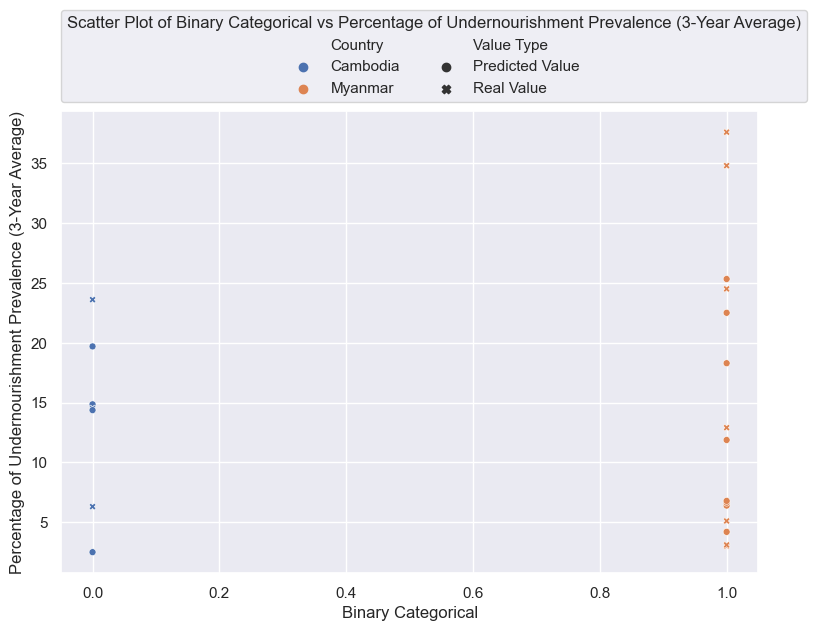

In [145]:
# Scatter Plot of Binary Categorical vs Percentage of Undernourishment Prevalence (3-Year Average)
# TARGET DATASET
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Binary Categorical", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df_plot, 
                style="Value Type", hue="Country", s=25)
myplot.legend(title = "Scatter Plot of " + "Binary Categorical" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

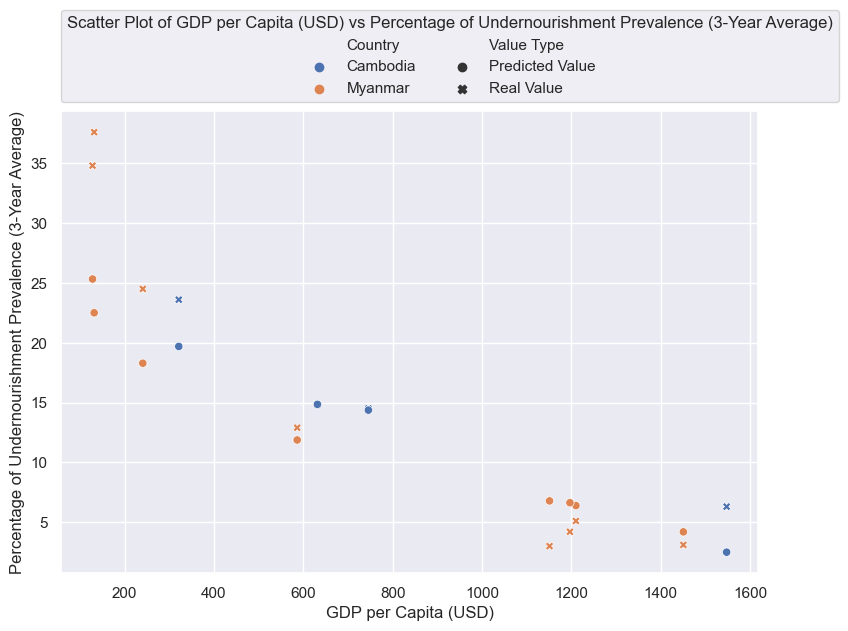

In [146]:
# Scatter Plot of GDP per Capita (USD) vs Percentage of Undernourishment Prevalence (3-Year Average)
# TARGET DATASET
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "GDP per Capita (USD)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df_plot, 
                style="Value Type", hue="Country")
myplot.legend(title = "Scatter Plot of " + "GDP per Capita (USD)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

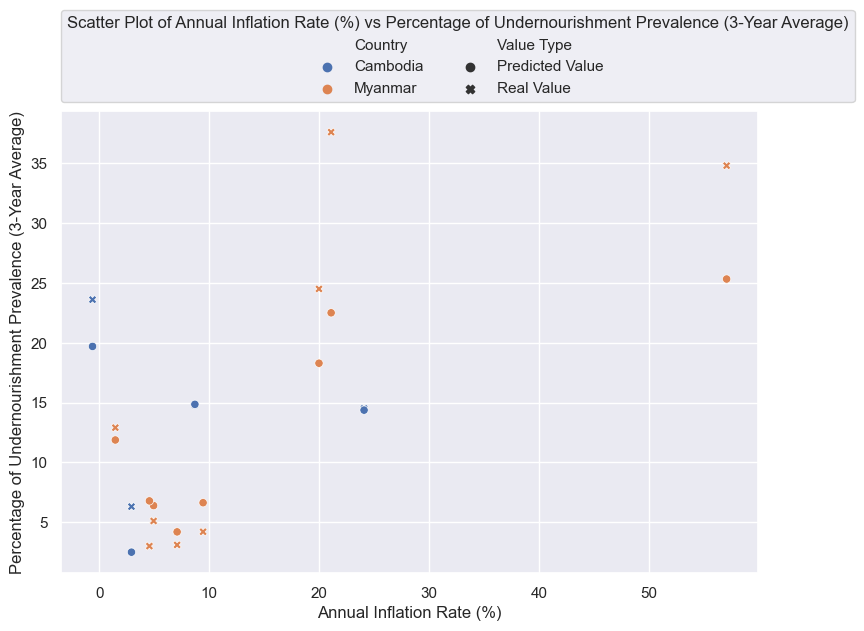

In [147]:
# Scatter Plot of Annual Inflation Rate (%) vs Percentage of Undernourishment Prevalence (3-Year Average)
# TARGET DATASET
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Annual Inflation Rate (%)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df_plot, 
                style="Value Type", hue="Country")
myplot.legend(title = "Scatter Plot of " + "Annual Inflation Rate (%)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

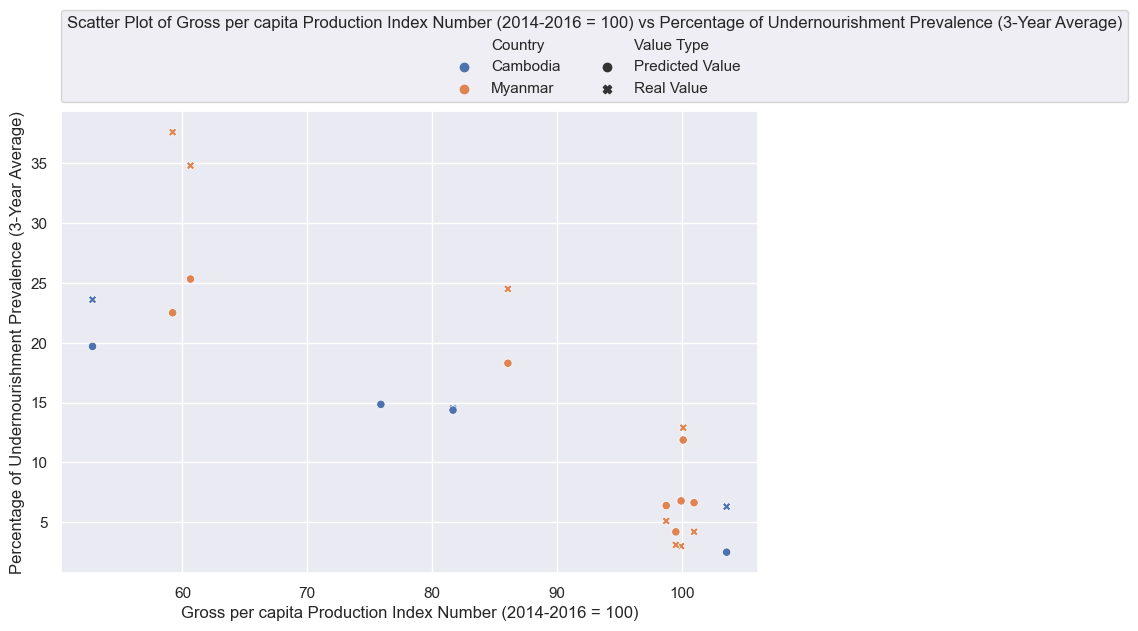

In [148]:
# Scatter Plot of Gross per capita Production Index Number (2014-2016 = 100) vs Percentage of Undernourishment Prevalence (3-Year Average)
# TARGET DATASET
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Gross per capita Production Index Number (2014-2016 = 100)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df_plot, 
                style="Value Type", hue="Country")
myplot.legend(title = "Scatter Plot of " + "Gross per capita Production Index Number (2014-2016 = 100)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

Evaluating Dataset with Metrics

$\mathrm{MSE}=\frac{1}{n} \sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2$

In [149]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y=prepare_target(df_target_test), ypred=pred)
print(mse)

34.18613205859854


$R^2=1-\frac{S S_{R E S}}{S S_{T O T}}=1-\frac{\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2}{\sum_{i=1}^n\left(y_i-\bar{y}\right)^2}$

In [150]:
# Coefficient of Determination (R²)
# Calculate r2 score by calling a function, the arguments must be a NumPy
r2 = r2_score(y=prepare_target(df_target_test), ypred=pred)
print(r2)

0.7507764554853553


$R_{a d j}^2=1-\frac{\left(1-R^2\right)(n-1)}{n-p-1}$

In [151]:
# Adjusted Coefficient of Determination (Adjusted R²)
# Calculate adjusted r2 score by calling a function, the arguments must be a NumPy for y and ypred
# P is the number of Independent Variables, which are the length of Features list
adjusted_r2 = adjusted_r2_score(y=prepare_target(df_target_test), ypred=pred, p=len(features))
print(adjusted_r2)

0.608363001476987


$S =\sqrt{1-R_{a d j}^2}\cdot S.D$

$S.D=\sqrt{\frac{\sum_{i=1}^n\left(x_i-\bar{x}\right)^2}{n-1}}$

In [152]:
# Standard Error of Regression (S)
# P is the number of Independent Variables, which are the length of Features list
std_eror_reg = std_error_reg_score(y=prepare_target(df_target_test), ypred=pred, p=len(features))
print(std_eror_reg)

1.0512212713901121


Testing All Dataset

In [153]:
df_features_all = df_features.copy() #ALL FEATURES DATASET
df_target_all = df_target.copy() #ALL TARGET DATASET

df_features_z_all = normalize_z(df_features_all) #NORMALIZED ALL FEATURES DATASET
df_features_z_all["Binary Categorical"] = (df.loc[:, "Binary Categorical"]).copy()
X_all = prepare_feature(df_features_z_all) #PREPARED NORMALIZED ALL FEATURES DATASET

target_all = prepare_target(df_target_all) #PREPARED 

In [165]:
alpha_all = 0.01
iterations_all = 1500
beta_multiple_all = np.zeros(((X_all.shape[1]), 1))
beta_multiple_all, J_multiple_all = gradient_descent(X_all, target_all, beta_multiple_all, alpha_all, iterations_all)
print(beta_multiple_all)

pred_all = predict(df_features_all, beta_multiple_all)

[[13.35021627]
 [ 0.34515079]
 [-5.07102806]
 [ 2.00884386]
 [-2.93990794]]


In [156]:
# Comparing Real Value of All Dataset vs Predicted Value of All Dataset
df_compare_target_predict_all = df.loc[:, ["Country", "Year", "Percentage of Undernourishment Prevalence (3-Year Average)"]]
df_compare_target_predict_all["Predicted Percentage of Undernourishment Prevalence (3-Year Average)"] = pred_all.copy()
display(df_compare_target_predict_all)
df_compare_target_predict_all["Features"] = (np.linspace(1, len(df_compare_target_predict_all), num=len(df_compare_target_predict_all))).astype(int)

max_val_target_predict_all = df_compare_target_predict_all.loc[:, ["Percentage of Undernourishment Prevalence (3-Year Average)", "Predicted Percentage of Undernourishment Prevalence (3-Year Average)"]].max(axis=0)
max_val_target_predict_all = max(max_val_target_predict_all.tolist())

,Country,Year,Percentage of Undernourishment Prevalence (3-Year Average),Predicted Percentage of Undernourishment Prevalence (3-Year Average)
0,Cambodia,2001,23.6,22.861364
1,Cambodia,2002,21.2,23.354355
2,Cambodia,2003,19.4,21.851224
3,Cambodia,2004,18.5,22.541740
4,Cambodia,2005,17.0,19.715373
5,Cambodia,2006,15.6,18.048822
6,Cambodia,2007,14.8,17.112722
7,Cambodia,2008,14.5,17.467472
8,Cambodia,2009,13.0,12.842782
9,Cambodia,2010,11.2,12.365131


Text(30.50000953125298, 35.471698113207545, 'Blue: Real Value')

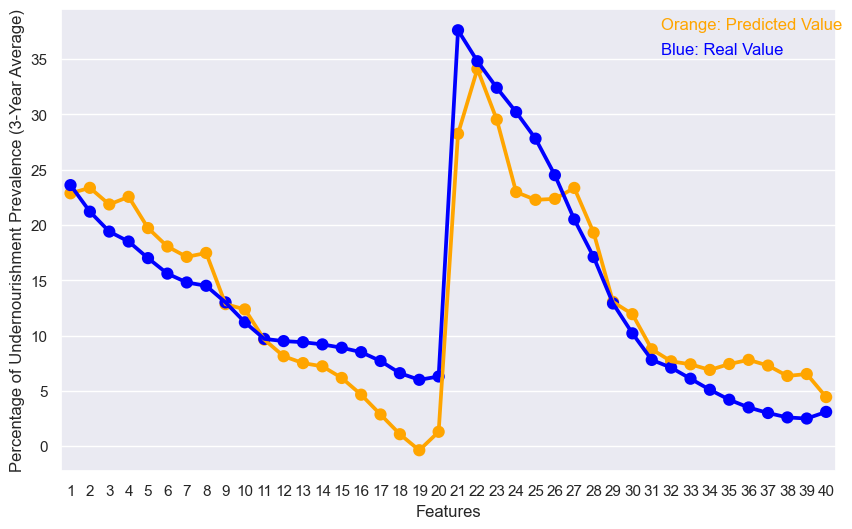

In [157]:
sns.set(rc={'figure.figsize':(10,6)})
sns.pointplot(data=df_compare_target_predict_all,
            x="Features", y="Predicted Percentage of Undernourishment Prevalence (3-Year Average)", 
            color="orange", label="Real Value")
#plt.annotate("Real Value", (9.4, 8))
sns.pointplot(data=df_compare_target_predict_all, 
            x="Features", y="Percentage of Undernourishment Prevalence (3-Year Average)", 
            color="blue")
plt.annotate("Orange: Predicted Value", 
            xy=(len(df_compare_target_predict_all)/1.311475, 1.0027*max_val_target_predict_all),
            color="orange")
plt.annotate("Blue: Real Value", 
            xy=(len(df_compare_target_predict_all)/1.311475, max_val_target_predict_all/1.06),
            color="blue")

In [158]:
mse_all = mean_squared_error(y=target_all, ypred=pred_all)
print(mse_all)

12.317309923521057


In [159]:
r2_all = r2_score(y=target_all, ypred=pred_all)
print(r2_all)

0.8575908412355183


In [160]:
adjusted_r2_all = adjusted_r2_score(y=target_all, ypred=pred_all, p=df_features_all.shape[1])
print(adjusted_r2_all)

0.8413155088052918


In [161]:
std_eror_reg_all = std_error_reg_score(y=target_all, ypred=pred_all, p=df_features_all.shape[1])
print(std_eror_reg_all)

0.19754898021652637


Verifying Dataset with Scikit Sklearn

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [163]:
# Extract the features and the target
df_features_scikit, df_target_scikit = get_features_targets(df, ['Binary Categorical', 'GDP per Capita (USD)', 'Annual Inflation Rate (%)', 'Gross per capita Production Index Number (2014-2016 = 100)'], ['Percentage of Undernourishment Prevalence (3-Year Average)'])

# Normalize the features train using z normalization
df_features_scikit = normalize_z(df_features_scikit)

# Split the data into training and test data set using scikit-learn function
df_features_train_scikit, df_features_test_scikit, df_target_train_scikit, df_target_test_scikit = train_test_split(df_features_scikit, df_target_scikit, test_size=0.3, random_state=100)

# Instantiate LinearRegression() object
model = LinearRegression()

# Call the fit() method and find the Beta Value
model.fit(df_features_train_scikit, df_target_train_scikit)
print(model.coef_, model.intercept_)

# Call the predict() method
pred_scikit = model.fit(df_features_train_scikit, df_target_train_scikit).predict(df_features_test_scikit)

[[-0.49385922 -5.77431188  1.71897267 -1.57648572]] [13.39563736]


In [164]:
# Call the r2_score method and find the r2 value
print(r2_score(df_target_test_scikit, pred_scikit))

0.8695103319770038
